In [1]:
datadir='/dls/i16/data/2018/mt18964-1/'
cifpath='/home/spc93/spc_cifs/'
import sys
sys.path
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
sys.path.append('/dls_sw/i16/software/python/crystal')
%matplotlib nbagg
from matplotlib.pyplot import *
from numpy import *
#from dlstools.quickfit import *
#from dlstools.dirty_fit import fit
import Crystal as Cr
from dlstools import dataloader
from dlstools.dataloader import vec2mat
d=dataloader.dlsloader(datadir+'%i.dat')
p=dataloader.tiffloader(d, lambda obj: datadir+obj.pilatus2m_path_template)
psnap=dataloader.tiffloader(datadir+'snapped-data/pilatus2M/'+'%05i.tif')

=== Importing dlstools package


/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "


=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


Could not import plotting routines
No module named py4j.java_gateway


In [3]:
mc = Cr.Crystal()
mc.load_cif(cifpath+'URu2Si2_cod_1538774_cifbib.cif')
refs=mc.reflection_list(8)

#    (h,k,l)           Intensity           Norm. Int.        Amplitude                               TwoTheta (deg)                d_spacing (A)       
1    (0, 0, 2)         47.7127190142       0.0485134051484   (6.90743939635+0j)                      18.6159319834                 4.791               
2    (1, 0, 1)         18350.2002031       18.6581422187     (135.462910803+0j)                      23.6080030947                 3.78805496388       
3    (1, 1, 0)         2858.17651492       2.90614071297     (53.4619164912+0j)                      30.8208218753                 2.91610836561       
4    (1, 0, 3)         33860.5545281       34.4287819749     (184.012376019+0j)                      35.740959039                  2.52520814999       
5    (1, 1, 2)         85442.2757924       86.8761166405     (292.305107366+0j)                      36.2491438074                 2.49097076936       
6    (0, 0, 4)         64089.5788562       65.1650915957     (253.159196665+0j)         

## Vetical scattering, U L3 edge

<IPython.core.display.Javascript object>


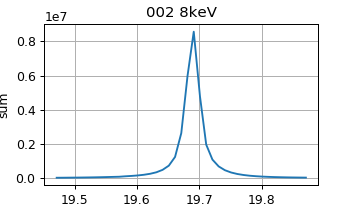

<IPython.core.display.Javascript object>


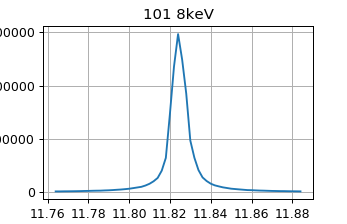

Text(0.5,1,u'101 8keV')

In [4]:
d(698634); d.plot('eta','sum'); title('002 8keV')
d(698634); d.plot('eta','sum'); title('002 8keV')

<IPython.core.display.Javascript object>


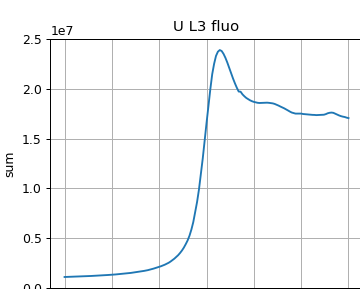

Text(0.5,1,u'U L3 fluo')

In [72]:
d(698657); d.plot('energy2','sum'); title('U L3 fluo')

<IPython.core.display.Javascript object>


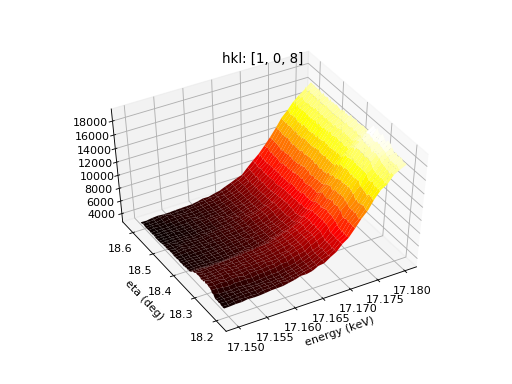

<IPython.core.display.Javascript object>


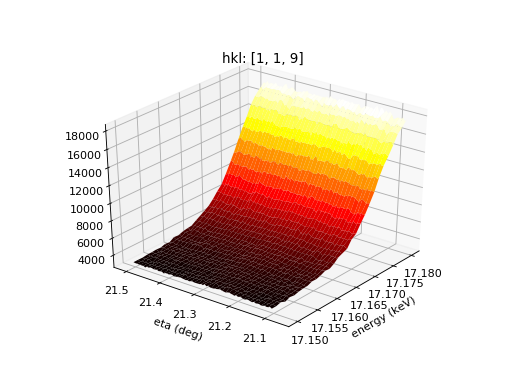

<IPython.core.display.Javascript object>


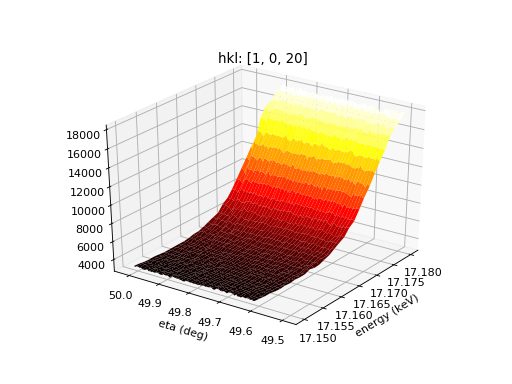

<IPython.core.display.Javascript object>


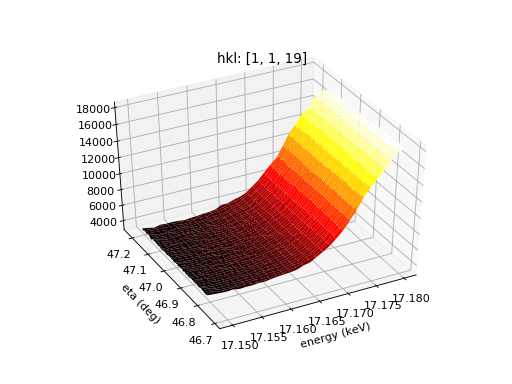

<IPython.core.display.Javascript object>


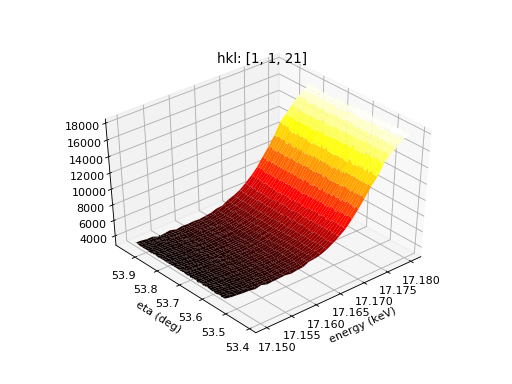

In [162]:
def plot_en_eta(scans):
    eta=[]; scroi=[]; en=[]
    for scan in scans:
        d(scan)
        eta+=list(d.eta)
        scroi+=list(d.roi1_sum)
        en+=list(d.eta * 0 + d.en)
    mx, my, mz = vec2mat(en, eta, scroi);
    figure(); gca(projection='3d').plot_surface(mx, my, mz, cmap=cm.hot); xlabel('energy (keV)'); 
    ylabel('eta (deg)'); title('hkl: [%i, %i, %i]' % (d.h, d.k, d.l))


#resultsrom script in previous cell
scans=range(698682,698682+31);
#d(scans[0]); print d.h, d.k, d.l; d(scans[-1]); print d.h, d.k, d.l, scans[-1]
plot_en_eta(scans)

scans=range(698712+1,698712+32);
#d(scans[0]); print d.h, d.k, d.l; d(scans[-1]); print d.h, d.k, d.l, scans[-1]
plot_en_eta(scans)

scans=range(698743+1,698743+32);
#d(scans[0]); print d.h, d.k, d.l; d(scans[-1]); print d.h, d.k, d.l, scans[-1]
plot_en_eta(scans)

scans=range(698774+1,698774+32);
#d(scans[0]); print d.h, d.k, d.l; d(scans[-1]); print d.h, d.k, d.l, scans[-1]
plot_en_eta(scans)

scans=range(698805+1,698805+32);
#d(scans[0]); print d.h, d.k, d.l; d(scans[-1]); print d.h, d.k, d.l, scans[-1]
plot_en_eta(scans)

print "Nothing except truncation rod passing through ROI in first dataset"


## Horizontal scattering, U L3 edge

<IPython.core.display.Javascript object>


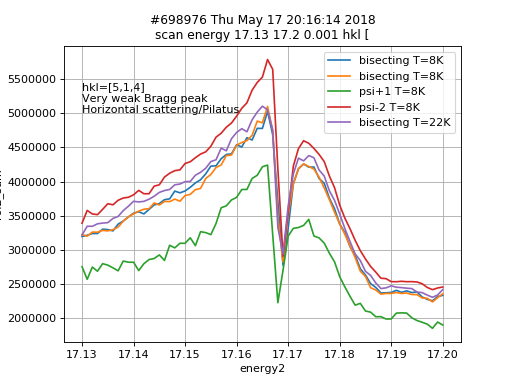

Text(17.13,5e+06,u'hkl=[5,1,4]\nVery weak Bragg peak\nHorizontal scattering/Pilatus')

In [178]:
## 514
figure()
d(698968); d.plot('energy2','roi2_sum', label='bisecting T=8K', hold=1)
d(698970); d.plot('energy2','roi2_sum', label='bisecting T=8K', hold=1)
d(698972); d.plot('energy2','roi2_sum', label='psi+1 T=8K', hold=1)
d(698974); d.plot('energy2','roi2_sum', label='psi-2 T=8K', hold=1)
d(698976); d.plot('energy2','roi2_sum', label='bisecting T=22K', hold=1)
legend()
text(17.13,5000000,'hkl=[5,1,4]\nVery weak Bragg peak\nHorizontal scattering/Pilatus')

Text(17.14,5.5e+06,u'ddd')

<IPython.core.display.Javascript object>


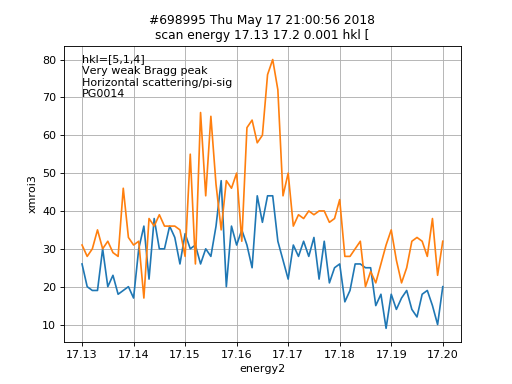

Text(17.13,70,u'hkl=[5,1,4]\nVery weak Bragg peak\nHorizontal scattering/pi-sig\nPG0014')

In [183]:
figure()
d(698990); d.plot('energy2','xmroi3', label='bisecting T=22K PA ps', hold=1)
d(698995); d.plot('energy2','xmroi3', label='bisecting T=8K PA ps', hold=1) 
text(17.13,70,'hkl=[5,1,4]\nVery weak Bragg peak\nHorizontal scattering/pi-sig\nPG0014')

<IPython.core.display.Javascript object>


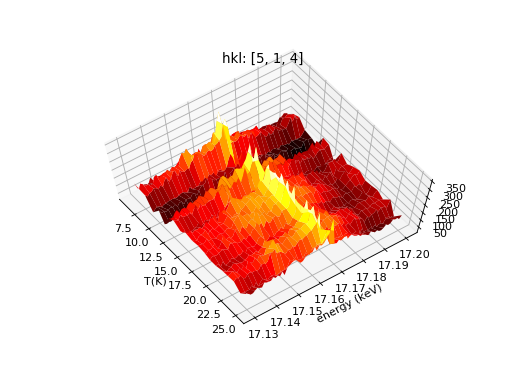

In [187]:
#series of energy scans [514] pi-sig to look for temperature dependence - nothing!
def plot_temp_energy(scans):
    T=[]; vortex=[]; energy=[]
    for scan in scans:
        d(scan)
        energy+=list(d.energy2)
        vortex+=list(d.xmroi3)
        T+=list(d.energy2 * 0 + d.Ta)
    mx, my, mz = vec2mat(T, energy, vortex);
    figure(); gca(projection='3d').plot_surface(mx, my, mz, cmap=cm.hot); ylabel('energy (keV)'); 
    xlabel('T(K)'); title('hkl: [%i, %i, %i]' % (5,1,4))
scans=range(698996+4,699095+1,5)
plot_temp_energy(scans)

<IPython.core.display.Javascript object>


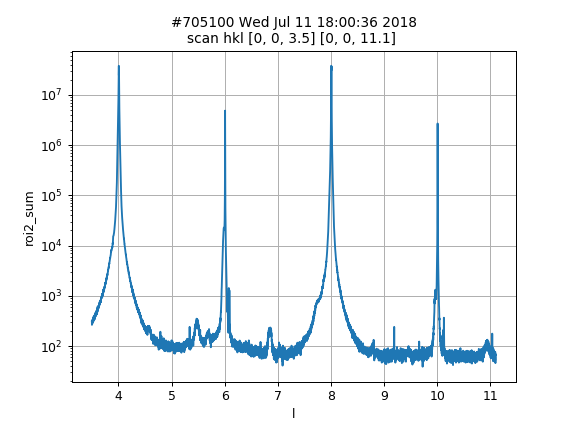

<IPython.core.display.Javascript object>


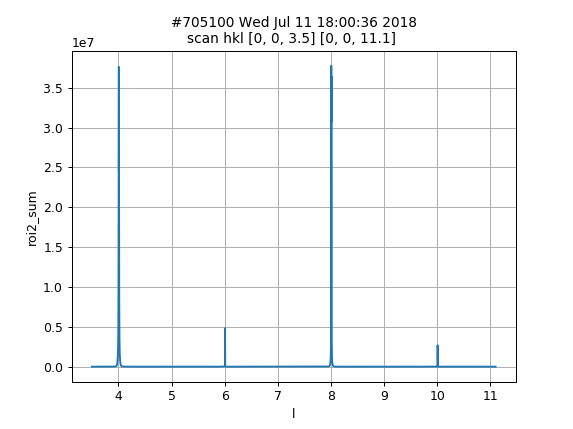

<IPython.core.display.Javascript object>


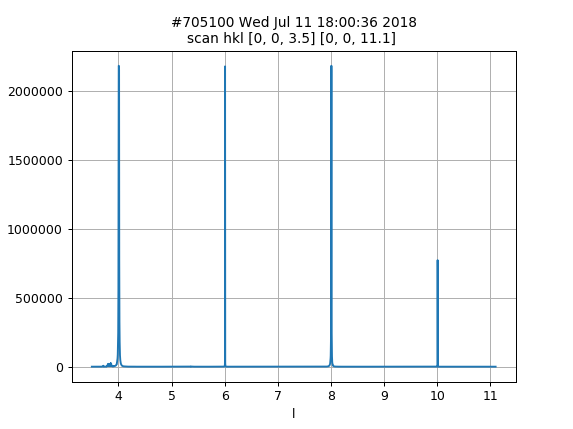

In [13]:
#new scans July 2018 room temp 8keV
d(705100)
d.plot('l','roi2_sum'); gca().set_yscale('log'); axis('tight')
d.plot('l','roi2_sum')
d.plot('l','maxval'); 

In [10]:
gca().set_yscale('log'); axis('tight')

(3.1200000000000001, 11.48, 0.99798246539399293, 4376014.7612171425)